Vérification des données


In [138]:
import pandas as pd
import numpy as np


# Définition des noms de colonnes d'après la documentation UCI
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]


# Liste des fichiers
files = [
    "data/processed.cleveland.data",
    "data/processed.hungarian.data",
    "data/processed.switzerland.data",
    "data/processed.va.data"
]

# Charger et fusionner tous les datasets
df_list = [pd.read_csv(f, names=columns) for f in files]
df = pd.concat(df_list, ignore_index=True)

# Vérifier la taille du nouveau dataset
print(f"Nombre total de lignes après fusion : {df.shape[0]}")



Nombre total de lignes après fusion : 920


In [146]:
print(df.info())  # Voir le type des colonnes

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    float64
 1   sex       299 non-null    float64
 2   cp        299 non-null    float64
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    float64
 6   restecg   299 non-null    float64
 7   thalach   299 non-null    float64
 8   exang     299 non-null    float64
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    float64
 11  ca        299 non-null    float64
 12  thal      299 non-null    float64
 13  target    299 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 35.0 KB
None


In [148]:
print(df.isnull().sum())  # Vérifier les valeurs manquantes


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [61]:
print(df.describe())  # Statistiques générales

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope      target  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std      0.994971   22.875003 

Nettoyage des valeurs manquantes

In [144]:
# Remplacer les '?' par NaN et convertir en numérique
df.replace("?", None, inplace=True)
df = df.apply(pd.to_numeric)

# Supprimer les lignes avec des valeurs manquantes
df.dropna(inplace=True)

# Vérifier si tout est propre
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    float64
 1   sex       299 non-null    float64
 2   cp        299 non-null    float64
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    float64
 6   restecg   299 non-null    float64
 7   thalach   299 non-null    float64
 8   exang     299 non-null    float64
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    float64
 11  ca        299 non-null    float64
 12  thal      299 non-null    float64
 13  target    299 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 35.0 KB
None


In [150]:
 # Remplacer les lignes valeurs manquantes par la moyenne
df["ca"] = df["ca"].fillna(df["ca"].mean())
df["thal"] = df["thal"].fillna(df["thal"].mean())
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    float64
 1   sex       299 non-null    float64
 2   cp        299 non-null    float64
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    float64
 6   restecg   299 non-null    float64
 7   thalach   299 non-null    float64
 8   exang     299 non-null    float64
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    float64
 11  ca        299 non-null    float64
 12  thal      299 non-null    float64
 13  target    299 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 35.0 KB
None


Analyse Exploratoire des Données (EDA)

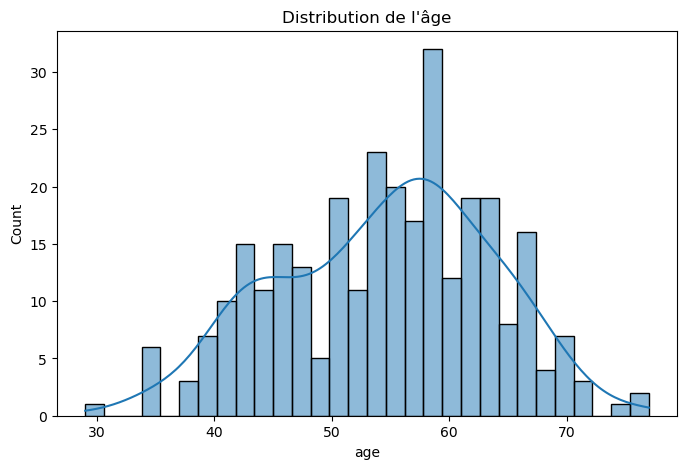

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribution de l'âge")
plt.show()


Répartition des patients malades / non-malades

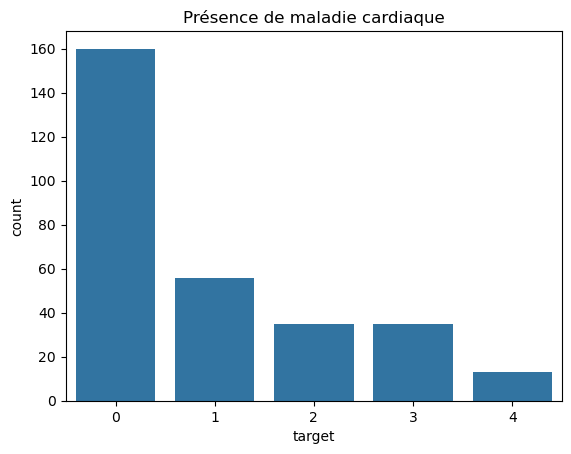

In [154]:
sns.countplot(x=df['target'])
plt.title("Présence de maladie cardiaque")
plt.show()


Corrélation entre certaines variables

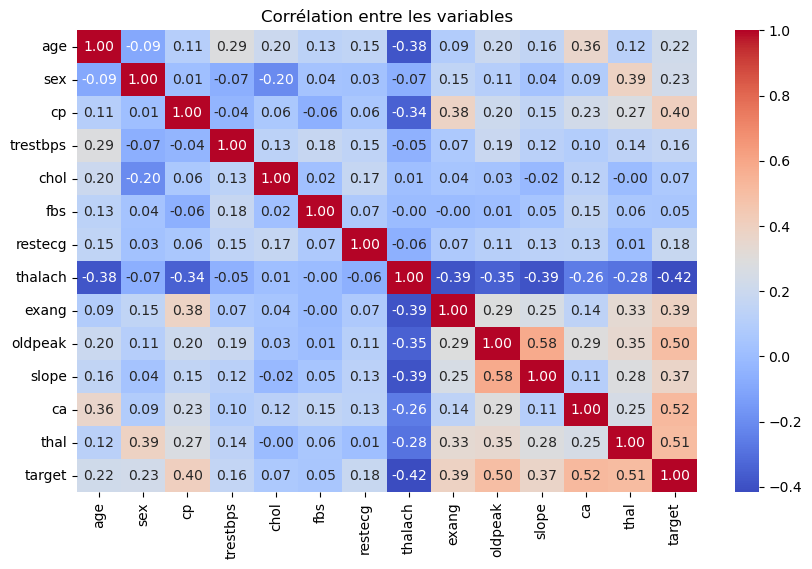

In [156]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre les variables")
plt.show()


Préparation pour le Machine Learning

1️⃣ Séparation des données en X (features) et y (cible)

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparer X (features) et y (cible)
X = df.drop(columns=["target"])
y = df["target"]

# Diviser en train/test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Taille du dataset d'entraînement: {X_train.shape}")
print(f"Taille du dataset de test: {X_test.shape}")


Taille du dataset d'entraînement: (239, 13)
Taille du dataset de test: (60, 13)


Standardiser les données

In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Entraînement des Modèles de Machine Learning

On va tester 6 algorithmes et comparer leurs performances :

✅ Régression Logistique
✅ K-Nearest Neighbors (KNN)
✅ Support Vector Machine (SVM)
✅ Arbre de décision
✅ Random Forest
✅ Adaboost

1️⃣ Importation des modèles

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Définition des modèles
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=100),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "AdaBoost": AdaBoostClassifier()
}

2️⃣ Entraînement et Évaluation des Modèles

In [168]:
# Dictionnaire pour stocker les scores
scores = {}

for name, model in models.items():
    print(f"🔹 Entraînement du modèle : {name}")
    model.fit(X_train, y_train)  # Entraînement
    y_pred = model.predict(X_test)  # Prédiction sur les données de test
    
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=1)
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    auc_roc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")
    
    # Stocker les scores
    scores[name] = [accuracy, precision, recall, f1, auc_roc]
    
    print(f"✅ {name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, AUC-ROC: {auc_roc:.4f}")
    print("-" * 50)


🔹 Entraînement du modèle : Logistic Regression
✅ Logistic Regression - Accuracy: 0.6500, Precision: 0.6660, Recall: 0.6500, F1: 0.6231, AUC-ROC: 0.8159
--------------------------------------------------
🔹 Entraînement du modèle : K-Nearest Neighbors
✅ K-Nearest Neighbors - Accuracy: 0.6167, Precision: 0.7146, Recall: 0.6167, F1: 0.5065, AUC-ROC: 0.8322
--------------------------------------------------
🔹 Entraînement du modèle : Support Vector Machine
✅ Support Vector Machine - Accuracy: 0.6000, Precision: 0.5841, Recall: 0.6000, F1: 0.5585, AUC-ROC: 0.8046
--------------------------------------------------
🔹 Entraînement du modèle : Decision Tree
✅ Decision Tree - Accuracy: 0.5500, Precision: 0.5595, Recall: 0.5500, F1: 0.5522, AUC-ROC: 0.5922
--------------------------------------------------
🔹 Entraînement du modèle : Random Forest
✅ Random Forest - Accuracy: 0.6333, Precision: 0.6035, Recall: 0.6333, F1: 0.5836, AUC-ROC: 0.7970
--------------------------------------------------
🔹 E

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


✅ AdaBoost - Accuracy: 0.4833, Precision: 0.6075, Recall: 0.4833, F1: 0.5125, AUC-ROC: 0.6821
--------------------------------------------------


Choix du modèle :

In [170]:
import joblib

# Sauvegarder le modèle KNN
joblib.dump(models["Logistic Regression"], "lr_model.pkl")

# Sauvegarder le scaler (nécessaire si les données ont été normalisées)
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']